# Testing QA4MBES functionality


In [1]:
from shapely.geometry import shape
import json

In [2]:
## awkward hack to import local modules in Jupyter
import sys
sys.executable
sys.path.append('/mnt/bigdata/frontierSI/qa4mbes-data-pipeline/qa4mbes')

In [3]:
import testcoverage

## Check XYZ ASCII point cloud coverage of a planned area

Does my XYZ point cloud cover any of the planned survey region? if so how much? if not roughly how far away were we?

### The positive case - we surveyed some of the planned region

In [9]:
coveragetest = testcoverage.testcoverage('../tests/4819-100000lines.xyz', '../tests/testcoverage.shp')

In [10]:
coveragetest

{'teststart': '2019-02-21T16:21:00.057066',
 'teststop': '2019-02-21T16:21:00.753891',
 'plannedcoverage': '../tests/testcoverage.shp',
 'testswath': '../tests/4819-100000lines.xyz',
 'percentcovered': 0.5445980785159709,
 'areacovered': 136304.97323926608,
 'centroiddistance': 235.72116814219288,
 'minimindistance': 0.0,
 'intersection': '{"type": "MultiPolygon", "coordinates": [[[[148.52895313064167, -41.825216204223096], [148.52934304544397, -41.826379949940716], [148.5223273977558, -41.82779374966494], [148.52160830119598, -41.827314351958414], [148.52161159, -41.82730296], [148.52159818187823, -41.82730760574656], [148.5215426477066, -41.82727058296548], [148.52154104, -41.82726223], [148.52153011825837, -41.82726223], [148.52150244492498, -41.82724378111107], [148.52157632, -41.82720113], [148.52154104, -41.82705857], [148.52158807, -41.82697711], [148.52164687, -41.82699747], [148.52164687, -41.82691601], [148.5216939, -41.82687527], [148.52164687, -41.82683454], [148.52165862, 

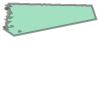

In [11]:
shape(json.loads(coveragetest["intersection"]))

### The null case - we didn't survey any of the planned region

In [12]:
coveragetest = testcoverage.testcoverage('../tests/4819-100000lines.xyz', '../tests/nulltest.shp')

In [13]:
coveragetest

{'teststart': '2019-02-21T16:21:01.905756',
 'teststop': '2019-02-21T16:21:02.596742',
 'plannedcoverage': '../tests/nulltest.shp',
 'testswath': '../tests/4819-100000lines.xyz',
 'percentcovered': None,
 'areacovered': None,
 'centroiddistance': 861.5700123271158,
 'minimindistance': 183.13389388218107,
 'intersection': None}

### Interpreting results

`testcoverage` returns a python dictionary containing:

- time of test start
- time of test stop
- path to the 'planned' coverage
- path to the survey swathe being tested
- % of planned coverage overlapped by the swath
- area (in metres) of the planned coverage overlapped by the swath
- distance (in metres) between the centroids of the planned coverage and the swath coverage
- minimum distance (in metres) between the planned and survey coverages. This is a rough guide mainly used to see how far away the survey was in the case of no overlap with the planned region
- a GeoJSON polygon describing the intersection of planned coverage and survey coverage

Optionally, it could contain GeoJSON polygons describing the actual coverages used in the test.

**question:** should swath density metrics be included here?

## 2. Test coverage of rasterised GeoTIFF data

## 3. Test swath point density
...how many points per metre/what's the average ground sampling distance?

## 4. Test grid density
...is my 1m grid really a 1m grid?